# Drug Consumption kNN and Confusion Matrix

In [1]:
#importing libraries that I am going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv('drug_consumption.csv', header = None)
pd.set_option('display.max_columns', 50)
df.head()

0        1        2        3        4        5        6        7        8   \
0   1  0.49788  0.48246 -0.05921  0.96082  0.12600  0.31287 -0.57545 -0.58331   
1   2 -0.07854 -0.48246  1.98437  0.96082 -0.31685 -0.67825  1.93886  1.43533   
2   3  0.49788 -0.48246 -0.05921  0.96082 -0.31685 -0.46725  0.80523 -0.84732   
3   4 -0.95197  0.48246  1.16365  0.96082 -0.31685 -0.14882 -0.80615 -0.01928   
4   5  0.49788  0.48246  1.98437  0.96082 -0.31685  0.73545 -1.63340 -0.45174   

        9        10       11       12   13   14   15   16   17   18   19   20  \
0 -0.91699 -0.00665 -0.21712 -1.18084  CL5  CL2  CL0  CL2  CL6  CL0  CL5  CL0   
1  0.76096 -0.14277 -0.71126 -0.21575  CL5  CL2  CL2  CL0  CL6  CL4  CL6  CL3   
2 -1.62090 -1.01450 -1.37983  0.40148  CL6  CL0  CL0  CL0  CL6  CL3  CL4  CL0   
3  0.59042  0.58489 -1.37983 -1.18084  CL4  CL0  CL0  CL3  CL5  CL2  CL4  CL2   
4 -0.30172  1.30612 -0.21712 -0.21575  CL4  CL1  CL1  CL0  CL6  CL3  CL6  CL0   

    21   22   23   24   25   26   27   28   29   30   31  
0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL2  CL0  CL0  
1  CL0  CL4  CL0  CL2  CL0  CL2  CL3  CL0  CL4  CL0  CL0  
2  CL0  CL0  CL0  CL0  CL0  CL0  CL0  CL1  CL0  CL0  CL0  
3  CL0  CL0  CL0  CL2  CL0  CL0  CL0  CL0  CL2  CL0  CL0  
4  CL0  CL1  CL0  CL0  CL1  CL0  CL0  CL2  CL2  CL0  CL0

In [3]:
#putting column names
df.columns = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", 
              "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", 
              "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

In [4]:
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl Benzos  \
0 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084     CL5    CL2  CL0    CL2   
1  1.43533  0.76096 -0.14277   -0.71126 -0.21575     CL5    CL2  CL2    CL0   
2 -0.84732 -1.62090 -1.01450   -1.37983  0.40148     CL6    CL0  CL0    CL0   
3 -0.01928  0.59042  0.58489   -1.37983 -1.18084     CL4    CL0  CL0    CL3   
4 -0.45174 -0.30172  1.30612   -0.21712 -0.21575     CL4    CL1  CL1    CL0   

  Caff Cannabis Choc Coke Crack Ecstasy Heroin Ketamine Legalh  LSD Meth  \
0  CL6      CL0  CL5  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
1  CL6      CL4  CL6  CL3   CL0     CL4    CL0      CL2    CL0  CL2  CL3   
2  CL6      CL3  CL4  CL0   CL0     CL0    CL0      CL0    CL0  CL0  CL0   
3  CL5      CL2  CL4  CL2   CL0     CL0    CL0      CL2    CL0  CL0  CL0   
4  CL6      CL3  CL6  CL0   CL0     CL1    CL0      CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0

In [5]:
#here is just a simple dictionary for understanding our datas clearly
Age_dictionary = {-0.95197: '18-24' ,-0.07854: '25-34' ,0.49788: '35-44' ,1.09449: '45-54' ,1.82213: '55-64' , 2.59171: '65+' }

Education_dictionary ={-2.43591 :'Left school before 16 years',
                       -1.73790:'Left school at 16 years',
                       -1.43719:' Left school at 17 years',
                       -1.22751:'Left school at 18 years',
                       -0.61113:'Some college or university, no certificate or degree',
                       -0.05921:'Professional certificate/ diploma',
                       0.45468:'University degree',
                       1.16365:'Masters degree ',
                       1.98437:'Doctorate degree'}

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64


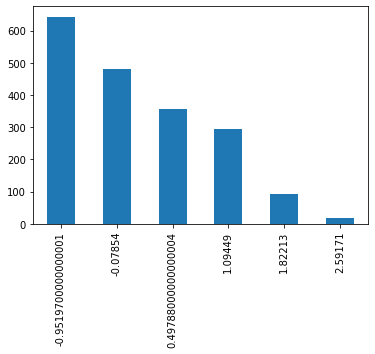

In [6]:
#first look what we have
age_count=df['Age'].value_counts()
print(age_count)

age_count.plot(kind='bar',);

-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    270
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Education, dtype: int64


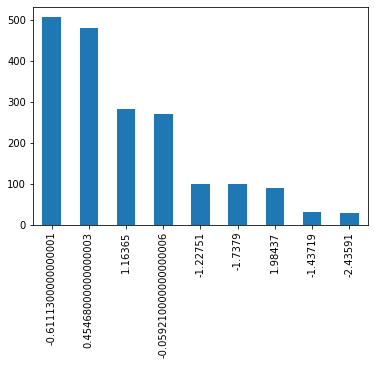

In [7]:
edu_count=df['Education'].value_counts()
print(edu_count)
edu_count.plot(kind='bar');

In [8]:
#I am dropping columns that I dont need because I will use Heroine as class label
df = df.drop(['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'], axis=1)

In [9]:
#Here is top 5 instances of our dataset
df.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore   Cscore  Impulsive       SS Heroin  
0 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084    CL0  
1  1.43533  0.76096 -0.14277   -0.71126 -0.21575    CL0  
2 -0.84732 -1.62090 -1.01450   -1.37983  0.40148    CL0  
3 -0.01928  0.59042  0.58489   -1.37983 -1.18084    CL0  
4 -0.45174 -0.30172  1.30612   -0.21712 -0.21575    CL0

In [10]:
#Checking null values
df.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Heroin       0
dtype: int64

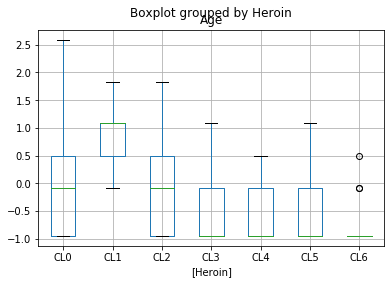

In [11]:
#Here is box plot of our Age and Education column
df.boxplot(column=['Age'],by=['Heroin'])
df.boxplot(column=['Education'],by=['Heroin'])

In [15]:
#Here is our scatter for our class label
#I tried to make different plots for each of our targets but I couldn't make it
plt.figure(figsize = (5, 5))
plt.xlabel('Education', fontsize = 10)
plt.ylabel('Age', fontsize = 10)
plt.title('Deneme', fontsize = 10)
plt.tick_params(axis='both', labelsize=10)

targets = ['CL3']
colors = [ 'y']
for target, color in zip(targets,colors):
    indices = df['Heroin'] == target
    plt.scatter(df.loc[indices, 'Education'], df.loc[indices, 'Age'], c = color, s = 40)
    
plt.legend(targets, fontsize=6)
plt.grid()
plt.plot(1.98437,0.49788, color='white', marker='*', markersize=5)

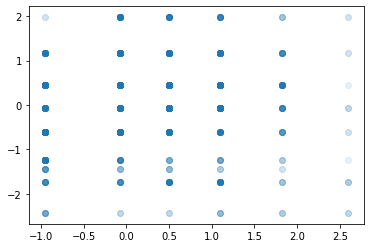

In [13]:
#This is for just showing our data distribution because we have a lot of overlapping data
plt.scatter(df['Age'],df['Education'],alpha=0.1)

In [14]:
#kNN implementation that we did in the class

test_x=np.array([[1.09449,-2.43591]])
Euc_dist = ((df['Age']- test_x[0,0])**2 + (df['Education']- test_x[0,1])**2)**0.5
print(Euc_dist)

0       2.450438
1       4.573278
2       2.450438
3       4.140632
4       4.460361
          ...   
1880    2.741864
1881    2.741864
1882    3.119537
1883    2.741864
1884    2.741864
Length: 1885, dtype: float64


In [15]:
#Calculating Euclidean distance
Euc_df=pd.DataFrame({'Euc_dist':Euc_dist})
df_dist=pd.concat([df, Euc_df],axis=1)
print(df_dist.head(1000))

       ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0       1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1       2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2       3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3       4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4       5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
..    ...      ...      ...        ...      ...        ...      ...      ...   
995   999 -0.07854  0.48246    1.98437 -0.57009   -0.31685 -1.05308  0.80523   
996  1000 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.67825  0.47617   
997  1001 -0.95197 -0.48246   -1.73790 -0.46841   -0.31685  1.23461 -1.09207   
998  1002 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.05188  0.96248   
999  1003  1.09449  0.48246   -0.61113 -0.28519   -0.31685 -0.34799  0.16767   

      Oscore   Ascore   Cscore  Impulsi

In [16]:
#sorting by euclidean distance
df_sortedDist = df_dist.sort_values('Euc_dist')
df_sortedDist

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
699    702  1.09449 -0.48246   -2.43591  0.96082   -0.31685 -1.05308  1.11406   
1862  1866  1.09449 -0.48246   -2.43591 -0.57009   -0.31685  0.73545 -0.43999   
685    688  1.09449  0.48246   -2.43591 -0.09765   -0.31685 -0.92104  0.63779   
1559  1563  1.09449  0.48246   -2.43591  0.96082   -0.31685  0.22393 -0.30033   
1495  1499  1.09449  0.48246   -2.43591 -0.57009   -0.31685  0.62967 -0.15487   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1497  1501 -0.07854 -0.48246    1.98437 -0.57009    0.11440 -0.34799  0.47617   
258    259  2.59171 -0.48246    1.98437  0.96082   -0.31685  0.52135 -0.15487   
80      81  2.59171  0.48246    1.98437  0.24923   -0.31685  0.04257  0.32197   
1153  1157 -0.95197 -0.48246    1.98437  0.96082   -0.31685 -0.92104  1.74091   
756    760 -0.95197 -0.48246    1.98437  0.96082   -0.31685 -2.75696  1.74091   

       Oscore   Ascore   Cscore  Impulsive       SS Heroin  Euc_dist  
699   0.44585  0.76096  1.13407   -0.71126  0.40148    CL0  0.000000  
1862  0.44585 -1.07533  0.25953    0.52975  0.40148    CL2  0.000000  
685  -0.97631  0.94156  0.25953   -1.37983 -2.07848    CL0  0.000000  
1559 -1.27553 -0.60633 -0.27607   -0.21712 -0.52593    CL0  0.000000  
1495 -0.45174 -0.45321 -1.01450    0.19268 -0.52593    CL0  0.000000  
...       ...      ...      ...        ...      ...    ...       ...  
1497 -0.01928 -0.60633 -0.00665    0.52975  1.22470    CL3  4.573278  
258  -0.45174 -1.47955  1.81175   -0.71126 -1.54858    CL0  4.666963  
80    0.44585 -0.15487  1.46191   -0.21712 -0.21575    CL0  4.666963  
1153  1.65653  1.61108 -0.52745   -0.21712  1.22470    CL0  4.871024  
756   0.58331  1.11406  0.25953   -0.71126  0.40148    CL0  4.871024  

[1885 rows x 15 columns]

In [17]:
#here I am triying to make my training and test data set

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = np.array(df.iloc[:, 1:12])
y = np.array(df['Heroin'])


In [18]:
#I am spliting them as %30 for test %70 for traing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [19]:
#knn for k=3
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, np.ravel(y_train))
kNN.predict(X_test)
kNN.score(X_test, y_test)

0.8250883392226148

In [20]:
#knn for k=5
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, np.ravel(y_train))
kNN.predict(X_test)
kNN.score(X_test, y_test)

0.8392226148409894

In [21]:
#knn for k=7
kNN = KNeighborsClassifier(n_neighbors=7)
kNN.fit(X_train, np.ravel(y_train))
kNN.predict(X_test)
kNN.score(X_test, y_test)

0.8445229681978799

In [22]:
#knn for k=9
kNN = KNeighborsClassifier(n_neighbors=9)
kNN.fit(X_train, np.ravel(y_train))
kNN.predict(X_test)
kNN.score(X_test, y_test)

0.8480565371024735

In [23]:
X_train

array([[ 0.49788,  0.48246, -0.61113, ..., -0.60633, -0.52745, -0.71126],
       [-0.95197, -0.48246,  0.45468, ..., -0.30172,  0.7583 , -0.21712],
       [-0.07854,  0.48246,  0.45468, ..., -0.91699,  0.25953,  0.19268],
       ...,
       [ 0.49788, -0.48246, -1.7379 , ..., -0.45321, -0.27607, -0.21712],
       [-0.07854,  0.48246,  1.98437, ..., -0.30172, -0.27607, -1.37983],
       [-0.95197, -0.48246, -0.61113, ...,  0.76096, -1.13788, -0.71126]])

In [24]:
knn=KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
#Here is we are training our dataset
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("accuracy : {}".format(accuracy_score(y_test,pred)))

accuracy : 0.8250883392226148


In [25]:
#we are creating list for our k values and k accuracy scores 
k_values=[i for i in range(1,len(X_train),2)]
k_acc_scores = [ ]

In [26]:
#this loop calculates how accured our predictions are for each data
for k in k_values:
    #we are using knn for k=3 in here
    knn=KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
    #In here we are spliting our train data in to 5 parts and tries to find best value of k
    cv_scores=cross_val_score(knn,X_train,y_train,cv=5, scoring='accuracy')
    k_acc_scores.append(cv_scores.mean())

In [27]:
#Here we are calculating our optimal k value
optimal_k=k_values[k_acc_scores.index(max(k_acc_scores))]

print("Optimal k value is {}".format(optimal_k))

Optimal k value is 1


In [28]:
#it is actually calculating optimal k value but I dont understand why It is plotting wrong
plt.plot(k_values,k_acc_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
#Here is we are going to calculare confusion matrix
knn=KNeighborsClassifier(1)
#Here is we are flattering our array
y_train=y_train.ravel()
y_train


array(['CL0', 'CL0', 'CL0', ..., 'CL0', 'CL0', 'CL0'], dtype=object)

In [31]:
#we are making out trainning
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [32]:
#Here is our prediction x_test
predict=knn.predict(X_test)
predict

array(['CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL1', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL3', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL3', 'CL0', 'CL0', 'CL0', 'CL0', 'CL2', 'CL0', 'CL0',
       'CL2', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL0', 'CL0', 'CL2', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL0', 'CL3', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0',
       'CL2', 'CL0', 'CL0', 'CL2', 'CL0', 'CL0', 'CL2', 'CL0', 'CL0',
       'CL0', 'CL1', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL3',
       'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL0', 'CL1', 'CL0', 'CL0',
       'CL0', 'CL0',

In [33]:
#Here is our confusion matrix for x_test
confusion_matrix(y_test,predict)

array([[420,  20,  18,  17,   4,   1,   3],
       [ 18,   4,   0,   0,   0,   0,   0],
       [ 15,   2,   4,   3,   1,   1,   0],
       [ 13,   0,   0,   1,   2,   0,   0],
       [  4,   0,   2,   2,   0,   0,   1],
       [  5,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [34]:
#Here is our prediction x_train
predict=knn.predict(X_train)
predict

array(['CL0', 'CL0', 'CL0', ..., 'CL0', 'CL0', 'CL0'], dtype=object)

In [35]:
#Here is our confusion matrix for prediction x_train
confusion_matrix(y_train,predict)

array([[1122,    0,    0,    0,    0,    0,    0],
       [   0,   46,    0,    0,    0,    0,    0],
       [   0,    0,   68,    0,    0,    0,    0],
       [   0,    0,    0,   49,    0,    0,    0],
       [   0,    0,    0,    0,   15,    0,    0],
       [   0,    0,    0,    0,    0,   11,    0],
       [   0,    0,    0,    0,    0,    0,    8]], dtype=int64)

In [36]:
knn.score(X_train,y_train)

1.0